<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-e-learning" data-toc-modified-id="Project-e-learning-1">Project e-learning</a></span></li><li><span><a href="#Preparation" data-toc-modified-id="Preparation-2">Preparation</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-3">Loading data</a></span><ul class="toc-item"><li><span><a href="#Tests" data-toc-modified-id="Tests-3.1">Tests</a></span></li><li><span><a href="#Scores" data-toc-modified-id="Scores-3.2">Scores</a></span></li><li><span><a href="#Registration" data-toc-modified-id="Registration-3.3">Registration</a></span></li></ul></li><li><span><a href="#Data-exploration-&amp;-preparation" data-toc-modified-id="Data-exploration-&amp;-preparation-4">Data exploration &amp; preparation</a></span><ul class="toc-item"><li><span><a href="#Scores-&amp;-Registration" data-toc-modified-id="Scores-&amp;-Registration-4.1">Scores &amp; Registration</a></span></li><li><span><a href="#Scores-&amp;-Scores" data-toc-modified-id="Scores-&amp;-Scores-4.2">Scores &amp; Scores</a></span></li><li><span><a href="#Drop-unnecessary-columns-and-rows" data-toc-modified-id="Drop-unnecessary-columns-and-rows-4.3">Drop unnecessary columns and rows</a></span></li></ul></li><li><span><a href="#Tasks" data-toc-modified-id="Tasks-5">Tasks</a></span><ul class="toc-item"><li><span><a href="#1.-Test-completion-rate" data-toc-modified-id="1.-Test-completion-rate-5.1">1. Test completion rate</a></span></li><li><span><a href="#2.-Module-completion-rate" data-toc-modified-id="2.-Module-completion-rate-5.2">2. Module completion rate</a></span></li><li><span><a href="#3.-The-most-popular-modules-and-modules-with-the-highest-churn-rate" data-toc-modified-id="3.-The-most-popular-modules-and-modules-with-the-highest-churn-rate-5.3">3. The most popular modules and modules with the highest churn rate</a></span></li><li><span><a href="#4.-Does-students-usually-pass-tests-on-time?" data-toc-modified-id="4.-Does-students-usually-pass-tests-on-time?-5.4">4. Does students usually pass tests on time?</a></span></li><li><span><a href="#5.-RFM-clusters-of-students" data-toc-modified-id="5.-RFM-clusters-of-students-5.5">5. RFM-clusters of students</a></span><ul class="toc-item"><li><span><a href="#R" data-toc-modified-id="R-5.5.1">R</a></span></li><li><span><a href="#F" data-toc-modified-id="F-5.5.2">F</a></span></li><li><span><a href="#M" data-toc-modified-id="M-5.5.3">M</a></span></li><li><span><a href="#RFM-table" data-toc-modified-id="RFM-table-5.5.4">RFM-table</a></span></li></ul></li></ul></li></ul></div>

# Project e-learning

The purpouse of this training project is to analyze completed lessons and answer the following questions:


1. Which test was the most difficult? And which test was the easiest? 


2. Which module was the most difficult? And which module was the easiest?


3. Which modules are the most popular (TOP-3)? And which modules have the highest churn rate (TOP-3)?


4. Does students usually pass tests on time?


5. Create RFM-clusters of students adapted to the learning objective. 

# Preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

There're 3 datasets:
- assessments.csv — a list of tests and available scores
- studentAssessment.csv — student's test results
- studentRegistration.csv — registration data

[Detailed data description is in READ_me](https://disk.yandex.ru/d/2xyjD2lRbBgLUQ)

## Tests

In [2]:
# read and check data about tests
tests = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/MXkCRjEYiX510A')
tests.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [3]:
# data size
tests.shape

(206, 6)

In [4]:
# data types
tests.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [5]:
# missing values
tests.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

## Scores

In [6]:
# read and check data about scores
scores = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/-MnhIVOq_XelrA')
scores.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [7]:
# data size
scores.shape

(173912, 5)

In [8]:
# data types
scores.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [9]:
# missing values
scores.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

## Registration

In [10]:
# read and check data about registrations
registration = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/lHxu2f3pUOCyNA')
registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [11]:
# data size
registration.shape

(32593, 5)

In [12]:
# data types
registration.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

In [13]:
# missing values
registration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

# Data exploration & preparation

## Scores & Registration

There are students in Registration witout registration date. If these students have scores delete them.

In [21]:
# add the column presentation_module to Registration
registration['presentation_module'] = registration.code_presentation + '_' + registration.code_module
registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,presentation_module
0,AAA,2013J,11391,-159.0,NaN,2013J_AAA
1,AAA,2013J,28400,-53.0,NaN,2013J_AAA
2,AAA,2013J,30268,-92.0,12.0,2013J_AAA
3,AAA,2013J,31604,-52.0,NaN,2013J_AAA
4,AAA,2013J,32885,-176.0,NaN,2013J_AAA


In [22]:
# add the column with student id and presentation_module to Registration
registration.id_student = registration.id_student.astype('string')
registration['student_presentation_module'] = registration.id_student + '_' + registration.presentation_module
registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,presentation_module,student_presentation_module
0,AAA,2013J,11391,-159.0,NaN,2013J_AAA,11391_2013J_AAA
1,AAA,2013J,28400,-53.0,NaN,2013J_AAA,28400_2013J_AAA
2,AAA,2013J,30268,-92.0,12.0,2013J_AAA,30268_2013J_AAA
3,AAA,2013J,31604,-52.0,NaN,2013J_AAA,31604_2013J_AAA
4,AAA,2013J,32885,-176.0,NaN,2013J_AAA,32885_2013J_AAA


In [23]:
# students who didn't register
notreg_students = registration[registration.date_registration != registration.date_registration].student_presentation_module

In [24]:
# add a column with presentation_module to Tests
tests['presentation_module'] = tests.code_presentation + '_' + tests.code_module
tests.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,presentation_module
0,AAA,2013J,1752,TMA,19.0,10.0,2013J_AAA
1,AAA,2013J,1753,TMA,54.0,20.0,2013J_AAA
2,AAA,2013J,1754,TMA,117.0,20.0,2013J_AAA
3,AAA,2013J,1755,TMA,166.0,20.0,2013J_AAA
4,AAA,2013J,1756,TMA,215.0,30.0,2013J_AAA


In [25]:
# add a column with presentation_module to Scores
scores = scores.merge(tests[['id_assessment', 'presentation_module']], how='left', on='id_assessment')
scores.head()

,id_assessment,id_student,date_submitted,is_banked,score,presentation_module
0,1752,11391,18,0,78.0,2013J_AAA
1,1752,28400,22,0,70.0,2013J_AAA
2,1752,31604,17,0,72.0,2013J_AAA
3,1752,32885,26,0,69.0,2013J_AAA
4,1752,38053,19,0,79.0,2013J_AAA


In [26]:
# add to Scores the column with student id and presentation_module
scores.id_student = scores.id_student.astype('string')
scores['student_presentation_module'] = scores.id_student + '_' + scores.presentation_module
scores.head()

,id_assessment,id_student,date_submitted,is_banked,score,presentation_module,student_presentation_module
0,1752,11391,18,0,78.0,2013J_AAA,11391_2013J_AAA
1,1752,28400,22,0,70.0,2013J_AAA,28400_2013J_AAA
2,1752,31604,17,0,72.0,2013J_AAA,31604_2013J_AAA
3,1752,32885,26,0,69.0,2013J_AAA,32885_2013J_AAA
4,1752,38053,19,0,79.0,2013J_AAA,38053_2013J_AAA


In [27]:
# check if there are students who didn't register to module, but got scores for it 
scores[scores.student_presentation_module.isin(notreg_students)]

,id_assessment,id_student,date_submitted,is_banked,score,presentation_module,student_presentation_module
49800,24286,575419,20,0,0.0,2014B_CCC,575419_2014B_CCC
76953,25348,550142,-1,1,64.0,2013J_DDD,550142_2013J_DDD
77551,25349,550142,-1,1,68.0,2013J_DDD,550142_2013J_DDD
78971,25350,550142,-1,1,82.0,2013J_DDD,550142_2013J_DDD
80619,25351,550142,-1,1,16.0,2013J_DDD,550142_2013J_DDD
89561,25363,604632,41,0,85.0,2014J_DDD,604632_2014J_DDD
96515,30709,2681277,32,0,94.0,2013J_EEE,2681277_2013J_EEE


In [28]:
# delete rows about scores that were received without registration
scores = scores[~(scores.student_presentation_module.isin(notreg_students))]

Some students canceled registration for the module. Check if there are scores that were received after unregistration. Delete these scores.

In [30]:
# add the column date_unregistration to Scores
scores = scores.merge(registration[['date_unregistration', 'student_presentation_module']], on='student_presentation_module')
scores.head()

,id_assessment,id_student,date_submitted,is_banked,score,presentation_module,student_presentation_module,date_unregistration
0,1752,11391,18,0,78.0,2013J_AAA,11391_2013J_AAA,NaN
1,1753,11391,53,0,85.0,2013J_AAA,11391_2013J_AAA,NaN
2,1754,11391,115,0,80.0,2013J_AAA,11391_2013J_AAA,NaN
3,1755,11391,164,0,85.0,2013J_AAA,11391_2013J_AAA,NaN
4,1756,11391,212,0,82.0,2013J_AAA,11391_2013J_AAA,NaN


In [31]:
# leave only scores taht was received before or without unregistration
scores = scores[(scores.date_submitted < scores.date_unregistration) | (scores.date_unregistration != scores.date_unregistration)]

## Scores & Scores

Scores contains 158 rows with missed scores. It's known that Exams are not accepted if results of midterm tests are not in the system. Check if there are students who received score on Exam but didn't receive score on one of the midterm tests.

In [33]:
# list of Exams id
exams_id = tests[tests.assessment_type == 'Exam'].id_assessment.unique()

In [34]:
# students who have missed scores on a midterm test
without_score = scores[(scores.score != scores.score) & ~(scores.id_assessment.isin(exams_id))].student_presentation_module

In [35]:
# drop rows with scores on Exams that shouldn't have been taken, as a student has missed scores on midterm test 
exam_to_drop = scores.query('(student_presentation_module in @without_score) & (id_assessment in @exams_id)').index
scores = scores.drop(exam_to_drop)

Some values of test passing date are negative. Part of them is test recredit from previous presentations. Leave these rows and drop rows where the values of test passing date are negative and the test wasn't recredit.

In [37]:
# leave only rows with date_submitted >= 0 and with recredited scores
scores = scores.query('(date_submitted >= 0) | ((date_submitted < 0) & (is_banked == 1))')

## Drop unnecessary columns and rows

In [42]:
scores.drop(columns=['student_presentation_module', 'date_unregistration', 'presentation_module'], inplace=True)
scores.shape

(173049, 5)

In [43]:
registration.drop(columns='student_presentation_module', inplace=True)
registration.shape

(32593, 6)

In [44]:
registration = registration.query('date_registration == date_registration')
registration.shape

(32548, 6)

In [45]:
tests.drop(columns='presentation_module', inplace=True)
tests.shape

(206, 6)

# Tasks

## 1. Test completion rate

For each test, calculate completion rate (number of students who passed the test successfully devided by the total number of students who passed this test).

Test with the highest completion rate is the easiest test. Test with the lowest completion rate is the most difficult test.

In [46]:
# count how many times each test was passed
total_test_pass = (scores.groupby('id_assessment', as_index=False)
                        .agg({'id_student': 'nunique'})
                        .rename(columns={'id_student': 'total_test_cnt'})
)
total_test_pass.head()

,id_assessment,total_test_cnt
0,1752,359
1,1753,342
2,1754,331
3,1755,303
4,1756,298


In [47]:
# count how many times each test was passed successfully
good_test_pass = (scores[scores.score >= 40].groupby('id_assessment', as_index=False)
                                            .agg({'id_student': 'nunique'})
                                            .rename(columns={'id_student': 'good_test_cnt'}) 
                )
good_test_pass.head()

,id_assessment,good_test_cnt
0,1752,352
1,1753,330
2,1754,325
3,1755,294
4,1756,290


In [48]:
# join total_test_pass and good_test_pass 
total_test_pass = total_test_pass.merge(good_test_pass, on='id_assessment')

In [49]:
# count completion rate
total_test_pass['completion_rate'] = total_test_pass.good_test_cnt / total_test_pass.total_test_cnt
total_test_pass.head()

,id_assessment,total_test_cnt,good_test_cnt,completion_rate
0,1752,359,352,0.980501
1,1753,342,330,0.964912
2,1754,331,325,0.981873
3,1755,303,294,0.970297
4,1756,298,290,0.973154


In [50]:
# test completion rate statistics
total_test_pass.completion_rate.describe()

count    188.000000
mean       0.955101
std        0.054609
min        0.589147
25%        0.937862
50%        0.973635
75%        0.992834
max        1.000000
Name: completion_rate, dtype: float64

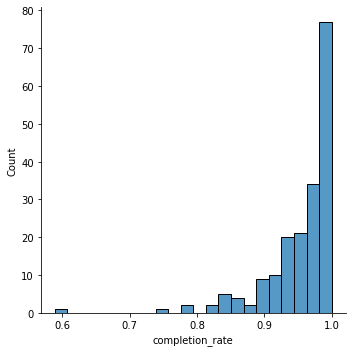

In [51]:
sns.displot(total_test_pass, x='completion_rate')

**75% of tests have a completion rate > 0.938. That means that most of tests are easy enough.**

**Look at 25% of tests with the lowest completion rate.**

In [52]:
# count 25th quantile
quantile_25 = total_test_pass.completion_rate.quantile(0.25)

In [53]:
# check tests with the lowest completion_rate
total_test_pass[total_test_pass.completion_rate < quantile_25].sort_values('completion_rate')

,id_assessment,total_test_cnt,good_test_cnt,completion_rate
43,15020,1677,988,0.589147
92,25360,450,334,0.742222
71,25339,503,392,0.779324
85,25353,844,664,0.786730
52,24286,1323,1079,0.815571
69,25337,725,603,0.831724
72,25340,598,502,0.839465
90,25358,617,519,0.841167
98,25366,1042,880,0.844530
79,25347,516,437,0.846899


**Many tests from 25% of 'the most difficult tests' have a completion rate > 0.8. This value is pretty high, as that means more than 8 students from 10 passed these tests successfully.**

**So to determine the most difficult tests, find tests with a completion rate < 0.8. And to determine the easiest tests, find tests with a completion rate == 1.**

In [54]:
# the easiest tests
easy_tests = total_test_pass[total_test_pass.completion_rate == 1].id_assessment
tests[tests.id_assessment.isin(easy_tests)]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
138,FFF,2013J,34879,CMA,236.0,0.0
151,FFF,2014B,34892,CMA,227.0,0.0
156,FFF,2014B,34896,CMA,227.0,0.0
166,FFF,2014J,34907,CMA,241.0,0.0
187,GGG,2014B,37429,CMA,222.0,0.0


In [55]:
# the most difficult tests
difficult_tests = total_test_pass[total_test_pass.completion_rate < 0.8].id_assessment
tests[tests.id_assessment.isin(difficult_tests)]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
48,BBB,2014J,15020,TMA,19.0,0.0
86,DDD,2013B,25339,TMA,200.0,15.0
93,DDD,2013J,25353,TMA,207.0,20.0
100,DDD,2014B,25360,TMA,200.0,20.0


## 2. Module completion rate

To count module completion rate, find the average completion rate of all tests within each module.

In [56]:
# add code_module and code_presentation to total_test_pass
total_test_pass = total_test_pass.merge(tests[['id_assessment', 'code_module', 'code_presentation']], on='id_assessment')
total_test_pass.head()

,id_assessment,total_test_cnt,good_test_cnt,completion_rate,code_module,code_presentation
0,1752,359,352,0.980501,AAA,2013J
1,1753,342,330,0.964912,AAA,2013J
2,1754,331,325,0.981873,AAA,2013J
3,1755,303,294,0.970297,AAA,2013J
4,1756,298,290,0.973154,AAA,2013J


In [57]:
# for each module and presentation calculate the average completion rate
module_avg_cr = (total_test_pass.groupby(['code_module', 'code_presentation'], as_index=False)
                                .agg({'completion_rate': 'mean'})
                )
module_avg_cr.head()

,code_module,code_presentation,completion_rate
0,AAA,2013J,0.974148
1,AAA,2014J,0.966236
2,BBB,2013B,0.977694
3,BBB,2013J,0.986082
4,BBB,2014B,0.980534


In [58]:
# module completion rate statistics
module_avg_cr.completion_rate.describe()

count    22.000000
mean      0.954105
std       0.037718
min       0.883715
25%       0.917265
50%       0.976411
75%       0.980531
max       0.986082
Name: completion_rate, dtype: float64

**To determine the most difficults modules, find 25% of modules with the lowest completion rate.**

**To determine the easiest modules, find 25% of modules with the highest completion rate.**

In [59]:
# the most difficult modules
module_q25 = module_avg_cr.completion_rate.quantile(0.25)
module_avg_cr[module_avg_cr.completion_rate < module_q25].sort_values('completion_rate')

,code_module,code_presentation,completion_rate
10,DDD,2014B,0.883715
8,DDD,2013B,0.892211
9,DDD,2013J,0.897315
6,CCC,2014B,0.898554
5,BBB,2014J,0.900606
7,CCC,2014J,0.915559


In [60]:
# the easiest modules
module_q75 = module_avg_cr.completion_rate.quantile(0.75)
module_avg_cr[module_avg_cr.completion_rate > module_q75].sort_values('completion_rate', ascending=False)

,code_module,code_presentation,completion_rate
3,BBB,2013J,0.986082
14,EEE,2014J,0.985518
18,FFF,2014J,0.982810
19,GGG,2013J,0.982384
15,FFF,2013B,0.981104
4,BBB,2014B,0.980534


## 3. The most popular modules and modules with the highest churn rate

For each module, count the number of registrations and unregistrations, then calculate churn rate (the number of unregistrations devided by number of registrations).

In [61]:
# count number of registrations by modules
registration_cnt = (registration.groupby(['code_module', 'code_presentation'], as_index=False)
                                .agg({'id_student': 'nunique'})
                                .rename(columns={'id_student': 'registration_cnt'}))
registration_cnt.head()

,code_module,code_presentation,registration_cnt
0,AAA,2013J,383
1,AAA,2014J,365
2,BBB,2013B,1766
3,BBB,2013J,2235
4,BBB,2014B,1608


In [62]:
# count the number of unregistrations
unregistration_cnt = (registration[registration.date_unregistration == registration.date_unregistration]
                                              .groupby(['code_module', 'code_presentation'], as_index=False)
                                              .agg({'id_student': 'nunique'})
                                              .rename(columns={'id_student': 'unregistration_cnt'}))
unregistration_cnt.head()

,code_module,code_presentation,unregistration_cnt
0,AAA,2013J,60
1,AAA,2014J,66
2,BBB,2013B,505
3,BBB,2013J,645
4,BBB,2014B,484


In [63]:
# join registration_cnt & unregistration_cnt
registration_cnt = registration_cnt.merge(unregistration_cnt, on=['code_module', 'code_presentation'])
registration_cnt.head()

,code_module,code_presentation,registration_cnt,unregistration_cnt
0,AAA,2013J,383,60
1,AAA,2014J,365,66
2,BBB,2013B,1766,505
3,BBB,2013J,2235,645
4,BBB,2014B,1608,484


In [64]:
# calculate the churn rate
registration_cnt['churn_rate'] = registration_cnt.unregistration_cnt / registration_cnt.registration_cnt

**To determine TOP-3 the most popular modules, find 3 modules with the highest number of registrations.**

**Determine TOP-3 modules with the highest churn rate.**

In [65]:
# the most popular modules
registration_cnt.sort_values('registration_cnt', ascending=False).head(3)

,code_module,code_presentation,registration_cnt,unregistration_cnt,churn_rate
7,CCC,2014J,2495,1047,0.419639
18,FFF,2014J,2363,829,0.350825
5,BBB,2014J,2291,735,0.320821


In [66]:
# modules with the highest churn rate
registration_cnt.sort_values('churn_rate', ascending=False).head(3)

,code_module,code_presentation,registration_cnt,unregistration_cnt,churn_rate
6,CCC,2014B,1931,893,0.462455
7,CCC,2014J,2495,1047,0.419639
10,DDD,2014B,1225,487,0.397551


**The most popular module (CCC 2014J) is also one of the modules with highest churn rate.**

## 4. Does students usually pass tests on time?

Compare dates of test passing with deadlines. Count how many students pass tests on time and how many pass after deadline

In [67]:
# add the column with deadlines to Scores
scores = scores.merge(tests[['id_assessment', 'date']], on='id_assessment')
scores.head()

,id_assessment,id_student,date_submitted,is_banked,score,date
0,1752,11391,18,0,78.0,19.0
1,1752,28400,22,0,70.0,19.0
2,1752,31604,17,0,72.0,19.0
3,1752,32885,26,0,69.0,19.0
4,1752,38053,19,0,79.0,19.0


In [68]:
scores.isna().sum()

id_assessment        0
id_student           0
date_submitted       0
is_banked            0
score              157
date              2859
dtype: int64

Some tests don't have deadlines, so replace them with test passing day.

In [71]:
scores.date.fillna(scores.date_submitted, inplace=True)

Calculate difference between deadline and passing date. Positive values and 0 mean that student passed test on time. Negative values mean that student passed after deadline

In [77]:
# calculate date difference
scores['date_diff'] = scores.date - scores.date_submitted
scores.head()

,id_assessment,id_student,date_submitted,is_banked,score,date,date_diff
0,1752,11391,18,0,78.0,19.0,1.0
1,1752,28400,22,0,70.0,19.0,-3.0
2,1752,31604,17,0,72.0,19.0,2.0
3,1752,32885,26,0,69.0,19.0,-7.0
4,1752,38053,19,0,79.0,19.0,0.0


In [78]:
# check how many times students passed tests after deadline
scores[scores.date_diff < 0].shape[0]

48990

In [79]:
# check how many times students passed tests on time
scores[scores.date_diff >= 0].shape[0]

124059

**Find percentage scores that ware received on time and that were received after deadline**

In [81]:
# percentage of scores received after deadline
round((scores[scores.date_diff < 0].shape[0] / scores.shape[0]), 2)

0.28

In [82]:
# percentage of scores received on time
round((scores[scores.date_diff >= 0].shape[0] / scores.shape[0]), 2)

0.72

**72% of scores are received on time.**

## 5. RFM-clusters of students

Clustering students can be useful for different purposes. For example:
- to reward the best students or students with the best progress
- to help diligent students with not very high scores
- to offer students who are not trying hard enough and have low scores to change specialization
- etc.

So cluster students by 3 parameters:
- R - on average how long before the deadline the student passes tests
- F - student's average completion rate
- M - student's average score

### R

The higher R, the earlier the student passes tests

In [83]:
# for each student, calculate the average time before deadline
avg_time_before_deadline = (scores.groupby('id_student', as_index=False)
                                    .agg({'date_diff': 'mean'})
                                    .rename(columns={'date_diff': 'avg_date_diff'})
                   )
avg_time_before_deadline.head()

,id_student,avg_date_diff
0,100064,23.250000
1,100282,0.000000
2,100561,0.142857
3,1006742,95.000000
4,100788,38.764706


In [84]:
# check average date difference statistics
avg_time_before_deadline.avg_date_diff.describe()

count    23106.000000
mean        12.525689
std         25.384590
min        -87.500000
25%         -1.250000
50%          0.800000
75%         16.081731
max        239.000000
Name: avg_date_diff, dtype: float64

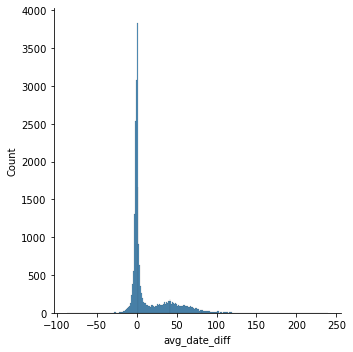

In [85]:
sns.displot(data=avg_time_before_deadline, x='avg_date_diff')

Divide the average date difference into 3, where 
- **1 means students who, on average, pass tests before deadlines**
- **2 means students who, on average, pass tests on the deadlne day**
- **3 means students who, on average, pass tests after deadlines**

In [86]:
avg_time_before_deadline['R'] = (avg_time_before_deadline.avg_date_diff.apply(lambda x: '1' if x > 0 else 
                                                                              ('2' if x == 0 else '3'))
                                                                              
                                            )
avg_time_before_deadline.head()

,id_student,avg_date_diff,R
0,100064,23.250000,1
1,100282,0.000000,2
2,100561,0.142857,1
3,1006742,95.000000,1
4,100788,38.764706,1


In [87]:
avg_time_before_deadline['R'].value_counts()

1    13251
3     8775
2     1080
Name: R, dtype: int64

### F

In [88]:
# calculate number of goog scores for each student
students_good_scores = (scores[scores.score >= 40].groupby('id_student', as_index=False)
                                                  .agg({'score': 'count'})
                                                  .rename(columns={'score': 'good_scores_cnt'})
            )
students_good_scores.head()

,id_student,good_scores_cnt
0,100064,12
1,100282,1
2,100561,6
3,1006742,2
4,100788,17


In [89]:
# calculate total number of scores for each student
students_total_scores = (scores.groupby('id_student', as_index=False)
                                 .agg({'score': 'count'})
                                 .rename(columns={'score': 'scores_total_cnt'})
            )
students_total_scores.head()

,id_student,scores_total_cnt
0,100064,12
1,100282,1
2,100561,7
3,1006742,2
4,100788,17


In [90]:
# join students_total_scores & students_good_scores
students_total_scores = students_total_scores.merge(students_good_scores, on='id_student')
students_total_scores.head()

,id_student,scores_total_cnt,good_scores_cnt
0,100064,12,12
1,100282,1,1
2,100561,7,6
3,1006742,2,2
4,100788,17,17


In [91]:
# calculate completion rate for each student
students_total_scores['completion_rate'] = students_total_scores.good_scores_cnt / students_total_scores.scores_total_cnt
students_total_scores.head()

,id_student,scores_total_cnt,good_scores_cnt,completion_rate
0,100064,12,12,1.000000
1,100282,1,1,1.000000
2,100561,7,6,0.857143
3,1006742,2,2,1.000000
4,100788,17,17,1.000000


In [92]:
# check completion_rate statistics
students_total_scores.completion_rate.describe()

count    22753.000000
mean         0.952877
std          0.118301
min          0.100000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: completion_rate, dtype: float64

Divide students into 3 groups:

1 - cr == 1 - students who passed all tests successfully

2 - 0.5 <= cr < 1 - students who passed successfully half or more than half of the tests

3 - cr < 0.5 - students who passed successfully less than half of the tests

In [93]:
students_total_scores['F'] = students_total_scores.completion_rate.apply(lambda x: '1' if x==1 else 
                                                                        ('2' if x >= 0.5 else '3')
                                                                        )
students_total_scores.head()

,id_student,scores_total_cnt,good_scores_cnt,completion_rate,F
0,100064,12,12,1.000000,1
1,100282,1,1,1.000000,1
2,100561,7,6,0.857143,2
3,1006742,2,2,1.000000,1
4,100788,17,17,1.000000,1


In [94]:
students_total_scores['F'].value_counts()

1    18332
2     4208
3      213
Name: F, dtype: int64

### M 

In [95]:
# for each student, calculate the average score by test
students_avg_score = (scores.groupby('id_student', as_index=False)
                    .agg({'score': 'mean'})
                    .rename(columns={'score': 'avg_score'})
    )
students_avg_score.head()

,id_student,avg_score
0,100064,89.333333
1,100282,78.000000
2,100561,67.142857
3,1006742,78.500000
4,100788,89.352941


In [96]:
students_avg_score.avg_score.describe()

count    23093.000000
mean        73.267735
std         15.276194
min          0.000000
25%         65.200000
50%         76.100000
75%         84.333333
max        100.000000
Name: avg_score, dtype: float64

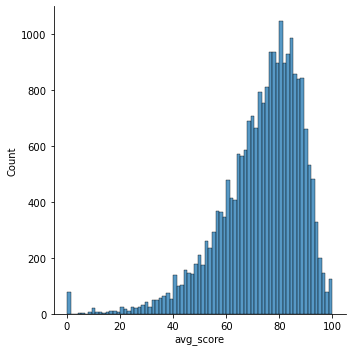

In [97]:
sns.displot(students_avg_score, x='avg_score')

Divide students into 3 groups:

1 - student's average score > average score of all students 

2 - 40 <= student's average score < average score of all students

3 - student's average score < 40

In [98]:
total_avg_score = students_avg_score.avg_score.mean()
students_avg_score['M'] = (students_avg_score.avg_score.apply(lambda x: '1' if x > total_avg_score else
                                                                       ('2' if x >= 40 else '3')
                                                             ))
students_avg_score.head()   

,id_student,avg_score,M
0,100064,89.333333,1
1,100282,78.000000,1
2,100561,67.142857,2
3,1006742,78.500000,1
4,100788,89.352941,1


In [99]:
students_avg_score['M'].value_counts()                       

1    13301
2     9067
3      738
Name: M, dtype: int64

### RFM-table

RFM-table allows to determine which cluster a student belongs to. For example,
- students from 111-cluster are the best students with the highest average score who pass all the tests and pass them on time;
- students from 222-cluster are students who successfully pass most of tests on the deadline day, but have scores less than average score of all students;
- students from 333-cluster are students who, on average, don't pass tests.

In [100]:
students_rfm = (avg_time_before_deadline.merge(students_total_scores[['id_student', 'completion_rate', 'F']]
                         .merge(students_avg_score, how='outer', on='id_student'))
                 
                 )
students_rfm.head()

,id_student,avg_date_diff,R,completion_rate,F,avg_score,M
0,100064,23.250000,1,1.000000,1,89.333333,1
1,100282,0.000000,2,1.000000,1,78.000000,1
2,100561,0.142857,1,0.857143,2,67.142857,2
3,1006742,95.000000,1,1.000000,1,78.500000,1
4,100788,38.764706,1,1.000000,1,89.352941,1


In [102]:
students_rfm['rfm'] = students_rfm['R'] + students_rfm['F'] + students_rfm['M']
students_rfm.head()

,id_student,avg_date_diff,R,completion_rate,F,avg_score,M,rfm
0,100064,23.250000,1,1.000000,1,89.333333,1,111
1,100282,0.000000,2,1.000000,1,78.000000,1,211
2,100561,0.142857,1,0.857143,2,67.142857,2,122
3,1006742,95.000000,1,1.000000,1,78.500000,1,111
4,100788,38.764706,1,1.000000,1,89.352941,1,111
